# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Import API key
import api_keys

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Create a reference to the citipy file and import it into a Pandas DataFrame
citipy_file = pd.read_csv("C:/Users/admin/Anaconda3/lib/site-packages/citipy/worldcities.csv")

In [19]:
# List for holding cities
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_keys = gkey

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="

In [21]:
#Create df to name variables
df = pd.DataFrame()
df['city']=cities

# Using .rename(columns={}) in order to rename columns
renamed_df = df.rename(columns={"city": "City"})

In [22]:
#Notate file beginning print statement
print("Beginning Data Retrieval")
print("----------------------------")

#Begin Record Counter
record = 0  

#Use for/except to loop through cities from citipy file that matched OpenWeather API and passed those that did not

for index, row in df.iterrows():
    city_name = row['city']
    record = record + 1        
    response = requests.get(query_url+city_name).json()
    
    try:          
        print(f"Processing Record {record} of Set 1 | {city_name}")
        df.loc[index,'Cloudiness'] = response['clouds']['all']  
        df.loc[index,'Country'] = response['sys']['country'] 
        df.loc[index,'Date'] = response['dt']
        df.loc[index,'Humidity'] = response['main']['humidity']
        df.loc[index,'Lat'] = response['coord']['lat']
        df.loc[index,'Lng'] = response['coord']['lon']
        df.loc[index,'Max Temp'] = response['main']['temp_max']
        df.loc[index,'Wind Speed'] = response['wind']['speed']        
      
    except:    
        print("City not found. Skipping...") 
        
#Notate file ending print statement
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")   

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | sakata
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | hofn
Processing Record 5 of Set 1 | tessalit
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | nadym
Processing Record 8 of Set 1 | stykkisholmur
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | snasa
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | shenandoah
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | safaga
City not found. Skipping...
Processing Record 16 of Set 1 | ejura
Processing Record 17 of Set 1 | sug-aksy
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | ornes


Processing Record 185 of Set 1 | tunduru
City not found. Skipping...
Processing Record 186 of Set 1 | hithadhoo
Processing Record 187 of Set 1 | biak
Processing Record 188 of Set 1 | talnakh
Processing Record 189 of Set 1 | wanning
Processing Record 190 of Set 1 | ostrovnoy
Processing Record 191 of Set 1 | neral
Processing Record 192 of Set 1 | khatanga
Processing Record 193 of Set 1 | vila franca do campo
Processing Record 194 of Set 1 | touros
Processing Record 195 of Set 1 | paka
Processing Record 196 of Set 1 | aflu
City not found. Skipping...
Processing Record 197 of Set 1 | nouadhibou
Processing Record 198 of Set 1 | zyryanka
Processing Record 199 of Set 1 | vao
Processing Record 200 of Set 1 | kruisfontein
Processing Record 201 of Set 1 | bileca
Processing Record 202 of Set 1 | ilhabela
Processing Record 203 of Set 1 | pisco
Processing Record 204 of Set 1 | kelvington
Processing Record 205 of Set 1 | lebu
Processing Record 206 of Set 1 | trofors
Processing Record 207 of Set 1 | 

Processing Record 366 of Set 1 | ganzhou
Processing Record 367 of Set 1 | alice springs
Processing Record 368 of Set 1 | phalombe
Processing Record 369 of Set 1 | henties bay
Processing Record 370 of Set 1 | ilulissat
Processing Record 371 of Set 1 | kitami
Processing Record 372 of Set 1 | sungairaya
Processing Record 373 of Set 1 | ribeira grande
Processing Record 374 of Set 1 | santa rosa
Processing Record 375 of Set 1 | fare
Processing Record 376 of Set 1 | constanza
Processing Record 377 of Set 1 | sahuaripa
Processing Record 378 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 379 of Set 1 | santa rita
Processing Record 380 of Set 1 | getahovit
Processing Record 381 of Set 1 | campbell river
Processing Record 382 of Set 1 | esmeraldas
Processing Record 383 of Set 1 | aguas vermelhas
Processing Record 384 of Set 1 | quarai
Processing Record 385 of Set 1 | san rafael
Processing Record 386 of Set 1 | iwakuni
Processing Record 387 of Set 1 | sosnovo-ozerskoye
Processi

Processing Record 550 of Set 1 | mariental
Processing Record 551 of Set 1 | srednekolymsk
Processing Record 552 of Set 1 | manakara
Processing Record 553 of Set 1 | labuhan
Processing Record 554 of Set 1 | qui nhon
City not found. Skipping...
Processing Record 555 of Set 1 | veraval
Processing Record 556 of Set 1 | miyako
Processing Record 557 of Set 1 | la ronge
Processing Record 558 of Set 1 | buin
Processing Record 559 of Set 1 | colomi
Processing Record 560 of Set 1 | pondicherry
Processing Record 561 of Set 1 | saint-joseph
Processing Record 562 of Set 1 | misratah
Processing Record 563 of Set 1 | belonia
Processing Record 564 of Set 1 | yamada
Processing Record 565 of Set 1 | kaseda
Processing Record 566 of Set 1 | shimoda
Processing Record 567 of Set 1 | yerbogachen
Processing Record 568 of Set 1 | sao joao batista
Processing Record 569 of Set 1 | itarema
Processing Record 570 of Set 1 | baisha
Processing Record 571 of Set 1 | yulara
Processing Record 572 of Set 1 | oussouye
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Renamed DataFrame to change city from lower Case to Upper Case
renamed_df = df.rename(columns={"city": "City"})

# Dropped NaN from DataFrame due to cities that did not have corresponding lat/lng in Open Weather API
revised_df = renamed_df.dropna()

#Revised Count displays DataFrame Row Counts
revised_df.count()

City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max Temp      528
Wind Speed    528
dtype: int64

In [24]:
revised_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,75.0,US,1.539302e+09,67.0,22.08,-159.32,82.94,11.41
1,sakata,75.0,JP,1.539302e+09,72.0,38.92,139.93,60.80,10.29
2,jamestown,0.0,AU,1.539305e+09,57.0,-33.21,138.60,64.30,10.67
3,hofn,92.0,IS,1.539305e+09,96.0,64.25,-15.21,47.78,13.47
4,tessalit,0.0,ML,1.539305e+09,34.0,20.20,1.01,68.57,5.97
5,mataura,92.0,NZ,1.539305e+09,67.0,-46.19,168.86,44.23,20.29
6,nadym,92.0,RU,1.539305e+09,99.0,65.53,72.51,31.36,7.65
7,stykkisholmur,88.0,IS,1.539305e+09,95.0,65.08,-22.73,46.43,16.26
8,atuona,24.0,PF,1.539305e+09,99.0,-9.80,-139.03,80.68,18.50
9,snasa,0.0,NO,1.539305e+09,94.0,64.25,12.38,35.77,3.51


In [25]:
# Export file as a CSV, without the Pandas index, but with the header
revised_df.to_csv("output_data/cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [26]:
# metrics for plots 
citylat = revised_df["Lat"]
maxtemp = revised_df["Max Temp"]
humid = revised_df["Humidity"]
cloudy = revised_df["Cloudiness"]
wind = revised_df["Wind Speed"]

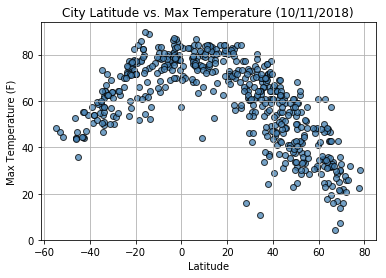

In [27]:
# Specifity parameters and format for plot below:
plt.title("City Latitude vs. Max Temperature ("  +  time.strftime("%m/%d/%Y") + ")" )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(x=citylat, y=maxtemp, alpha=.75, edgecolors="black", facecolors="steelblue")
plt.grid(True)
plt.savefig("output_data/LatitudevsTemp.png")

#### Latitude vs. Humidity Plot

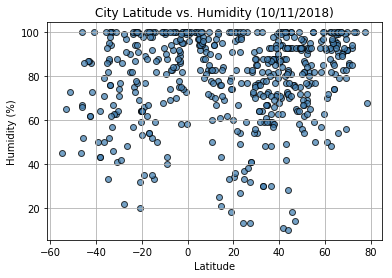

In [28]:
# Specifity parameters and format for plot below:
plt.title("City Latitude vs. Humidity ("  +  time.strftime("%m/%d/%Y") + ")" )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x=citylat, y=humid, alpha=.75, edgecolors="black", facecolors="steelblue")
plt.grid(True)
plt.savefig("output_data/LatitudevsHumidity.png")

#### Latitude vs. Cloudiness Plot

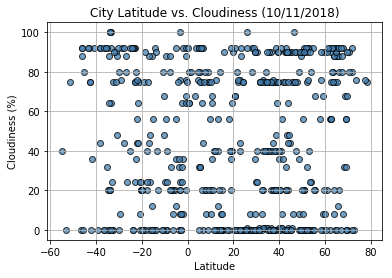

In [29]:
# Specifity parameters and format for plot below:
plt.title("City Latitude vs. Cloudiness ("  +  time.strftime("%m/%d/%Y") + ")" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(x=citylat, y=cloudy, alpha=.75, edgecolors="black", facecolors="steelblue")
plt.grid(True)
plt.savefig("output_data/LatitudevsCloudiness.png")

#### Latitude vs. Wind Speed Plot

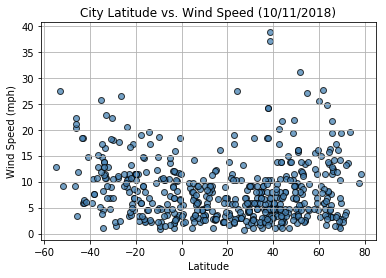

In [30]:
# Specifity parameters and format for plot below:
plt.title("City Latitude vs. Wind Speed ("  +  time.strftime("%m/%d/%Y") + ")" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(x=citylat, y=wind, alpha=.75, edgecolors="black", facecolors="steelblue")
plt.grid(True)
plt.savefig("output_data/LatitudevsWind.png")

Notate description of three observable trends based on the data:
    1.  As the latitude increases, the temperature decreases due to closer proximity to the Northern Hemisphere.
    2.  Humidity tends to be higher in cities located at 40° latitide or higher.
    3.  The majority of cities are located in areas where wind speed is relatively less than 10 mph.